In [2]:
import pandas as pd

In [7]:
cd Downloads


C:\Users\16478\Downloads


In [8]:
dataset = pd.read_csv('diabetes.csv')

In [9]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
dataset.shape

(768, 9)

In [12]:
type(dataset)

pandas.core.frame.DataFrame

In [13]:
dataset.tail()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [14]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
pd.unique(dataset['Outcome'])

array([1, 0], dtype=int64)

#Slicing the data in dataset

In [30]:
# Select first 5 rows of two first columns
firstFeature = dataset.iloc[0:,[1,4]]
firstFeature

,Glucose,Insulin
0,148,0
1,85,0
2,183,0
3,89,94
4,137,168
...,...,...
763,101,180
764,122,0
765,121,112
766,126,0


In [19]:
# Select first 5 rows of the last columns
label = dataset.iloc[0:5,-1]
label

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
# concatinate two DataFrame by columns
concatData = pd.concat([firstFeature,label],axis=1)
concatData

,Pregnancies,Glucose,Outcome
0,6,148,1
1,1,85,0
2,8,183,1
3,1,89,0
4,0,137,1


In [21]:
# save data
concatData.to_csv('slicedData.csv', index=False)

In [38]:
X2 = dataset.iloc[:,0:-1]
y2 = dataset.iloc[:,-1]

print(X2.head(),'\n')
print('labels:\n',y2.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

labels:
 0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


# Data Visualization

#1 MATPLOTLIB PYPLOT

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

C:\Users\16478\AppData\Local\Temp/ipykernel_23672/2315880008.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  dataset.hist(ax=ax)


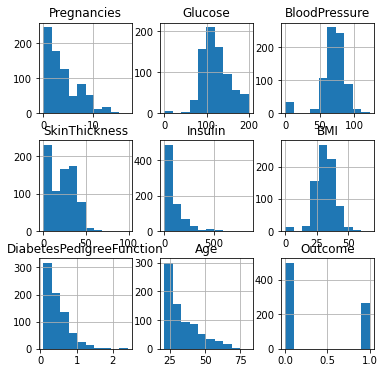

In [37]:
pr = plt.figure(figsize = (6,6))
ax = pr.gca()
dataset.hist(ax=ax)
plt.show()

In [39]:
from sklearn import preprocessing

s = preprocessing.MinMaxScaler()
s.fit(X2)
X_norm2 = s.transform(X2)

# X = preprocessing.normalize(X, norm='l2')

print(type(X_norm2))


<class 'numpy.ndarray'>


In [40]:
print('Before Normalization')
print(X2.head(),'\n')
print('After Normalization')
print((pd.DataFrame(X_norm2)).head())

Before Normalization
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33   

After Normalization
          0         1         2         3         4         5         6  \
0  0.352941  0.743719  0.590164  0.353535  0.000000  0.500745  0.234415   
1  0.058824  0.427136  0.540984  0.292929  0.000000  0.396423  0.116567   
2  0.470588  0.919598  0.524590  0.000000  0.000000  0.347243  0.253629   
3  0.058824  0

In [44]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_validate

import numpy as np

scoring = ['precision', 'recall', 'accuracy'] 

clf2 = KNeighborsClassifier (n_neighbors=12, metric='euclidean')

scores2 = cross_validate(clf2, X_norm2, y2,cv=5, scoring=scoring)

prec2 = np.mean (scores2['test_precision'])

rec2= np.mean (scores2[ 'test_recall'])

acc2= np.mean (scores2['test_accuracy']) 

print('Average precision is:', prec2)

print('Average recall is:', rec2)

print('Average accuracy is:', acc2)

Average precision is: 0.7146309019885871
Average recall is: 0.47393431167016076
Average accuracy is: 0.750021220609456


Text(0.5, 1.0, '2-class Precision-Recall curve')

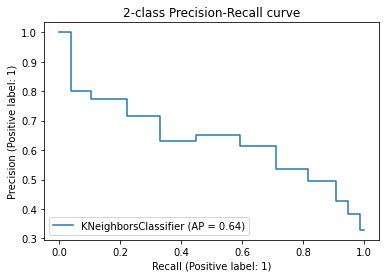

In [62]:
from sklearn.metrics import plot_precision_recall_curve 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split (X_norm2, y2, test_size=0.3, random_state=None) 

clf2.fit(X_train, y_train)

disp = plot_precision_recall_curve (clf2, X_test, y_test)

disp.ax_.set_title('2-class Precision-Recall curve')